##Paso 1: Configuración del entorno de PySpark en Colab

In [11]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

!tar xf spark-3.5.0-bin-hadoop3.tgz

#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
18 packages can be upgraded. Run 'apt list --upgradable' to see them.


'/content/spark-3.5.0-bin-hadoop3'

In [2]:
#Verificar la funcionalidad de Pyspark
from pyspark.sql import SparkSession
spark_session = SparkSession.builder.appName('Andre').getOrCreate()
spark_session

your 131072x1 screen size is bogus. expect trouble
23/09/28 17:38:30 WARN Utils: Your hostname, Nitro-Andre resolves to a loopback address: 127.0.1.1; using 172.22.45.199 instead (on interface eth0)
23/09/28 17:38:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/28 17:38:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# Vendedores con PANDAS
import pandas as pd
import matplotlib.pyplot as plt

reporte = pd.read_excel("vendedores.xlsx")
print (reporte)

In [4]:
reporteNorte = reporte.groupby('REGION').get_group('NORTE')
print (reporteNorte)

  REGION    ID          NOMBRE              APELLIDO  SALARIO  \
0  NORTE  8725          Arturo       Bustos González    12041   
1  NORTE  4352      Jesús Said           Caro Ibarra    11504   
2  NORTE  5185     Ana Valeria       Cruz Montesinos    10046   
3  NORTE  6918         Miranda           Doring Romo    10266   
4  NORTE  8607  Bruno Guissepe        Garcini García    10431   
5  NORTE  5158   Donovan Hiram           García Cruz    11773   
6  NORTE  5397          Ixchel          García Galán     8654   
7  NORTE  2353       Sebastián       Garduño Pabello    11777   
8  NORTE  5467         Gustavo     Guadarrama García    12071   
9  NORTE  2523      Juan Pablo  Herrera Moro Salcedo    12072   

   UNIDADES VENDIDAS  VENTAS TOTALES  PORCENTAJE DE VENTAS  
0                212            4554              0.069343  
1                488            3298              0.050218  
2                429            7238              0.110211  
3                109            5635    

In [5]:
ventasNorte = reporteNorte['VENTAS TOTALES']
print (ventasNorte)
print ('Promedio de ventas region norte: ', ventasNorte.mean())

0     4554
1     3298
2     7238
3     5635
4     5405
5     3577
6    10020
7     7922
8     8972
9     9053
Name: VENTAS TOTALES, dtype: int64
Promedio de ventas region norte:  6567.4


In [6]:
vendedoresNorte = reporteNorte['NOMBRE']
print (vendedoresNorte)



0            Arturo
1        Jesús Said
2       Ana Valeria
3           Miranda
4    Bruno Guissepe
5     Donovan Hiram
6            Ixchel
7         Sebastián
8           Gustavo
9        Juan Pablo
Name: NOMBRE, dtype: object


In [7]:
salariosNorte = reporteNorte['SALARIO']
print (salariosNorte)

0    12041
1    11504
2    10046
3    10266
4    10431
5    11773
6     8654
7    11777
8    12071
9    12072
Name: SALARIO, dtype: int64


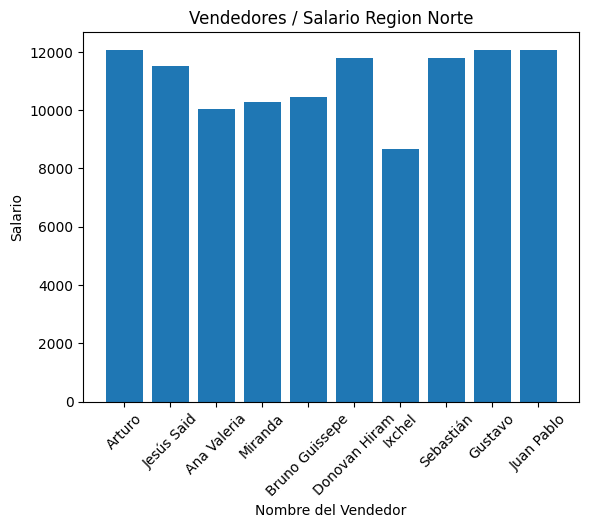

In [8]:
plt.bar(vendedoresNorte, salariosNorte)
plt.xlabel('Nombre del Vendedor')
plt.ylabel('Salario')
plt.title('Vendedores / Salario Region Norte')
plt.xticks(rotation = 45)
plt.show()
